# Case Study on Global Temperature time series data
DS412 Time Series Analysis and Stoachastic Processes

## Authors

**Group 5, DS4A**

- Chris Andrei Irag*
- Ephraem Requilman
- Joanna Reyda Santos
- Kobe Marco Olaguir
- Rod Vincent Dela Vega
- Ruszed Jy Ayad

*[chrisandrei.irag@1.ustp.edu.ph](mailto:chrisandrei.irag@1.ustp.edu.ph)

In [ ]:
import polars as pl # Dataframes / data manipulation
import seaborn as sns # visualization

import matplotlib.pyplot as plt # visualization
from src.config import DirectoryPaths # abstracted file paths
from src.matplotlib import Color, Styles # abstracted plot customization

plt.style.use(Styles.CMR10.value)

# Reading Data

### Data Source and Description

<u>**ERA5 post-processed daily statistics on single levels from 1940 to present**</u>

This data was obtained from the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics?tab=overview) (CDS) as part of previous coursework, which has now been repurposed for this case study.

The data mainly consists of precomputed daily average temperatures in Kelvin (K) from 1940 to 2024.


| Column      | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| temp_year   | Years as Anno Domini of the Gregorian Calendar                              |
| temp_month  | Months of the Gregorian Calendar, 1 being January, and 12 being December    |
| temp_day    | Days in the Months of the Gregorian Calendar                                |
| avg_temp    | Daily averages of 2 meter global average temperature                        |


[Digital Object Identifier](https://doi.org/10.24381/cds.4991cf48)

In [20]:
temp_data = pl.read_parquet(DirectoryPaths.EXTERNAL_DATA.value / "era5-2m-temperature-global-daily-avg.parquet")
temp_data

temp_year,temp_month,temp_day,avg_temp
i64,i64,i64,f64
1940,1,2,276.007051
1940,1,3,275.975732
1940,1,4,275.934177
1940,1,5,275.893011
1940,1,6,275.7141
…,…,…,…
2024,12,27,278.369356
2024,12,28,278.28687
2024,12,29,278.242523


# Data Exploration

In [21]:
from src.utils import ensure_path
PLOTS = DirectoryPaths.FIGURES_DIR.value / "plots"
ensure_path(PLOTS)

PosixPath('/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/figures/plots')

## Daily Average Temperature (1940-2024)

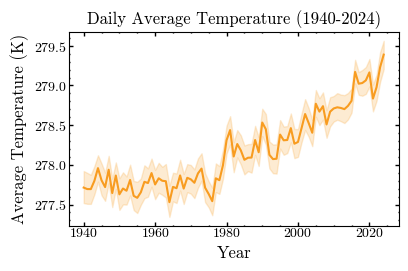

In [22]:
sns.lineplot(data=temp_data, x="temp_year", y="avg_temp",
    color=Color.ORANGE.value)
plt.title("Daily Average Temperature (1940-2024)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (K)")

plt.savefig(
    PLOTS / "daily-average-temperature-1940-2024.svg",
    format="svg", 
    dpi=300,
    transparent=True, 
    bbox_inches="tight"
    )

**Observations**

The graph shows a clear upward trend. Average daily temperature has steadily risen from about 277.5 K in the 1940s to over 279.5 K in 2024, which points to long-term warming. (K)

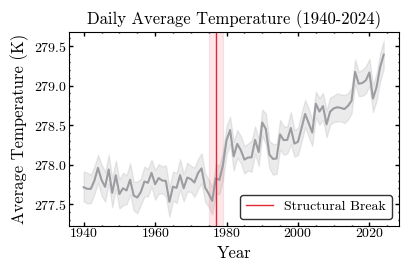

In [44]:
sns.lineplot(data=temp_data, x="temp_year", y="avg_temp",
    color=Color.GRAY.value)
plt.title("Daily Average Temperature (1940-2024)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (K)")
plt.axvline(x=1977, ymin=0, ymax=1, color=Color.RED.value, linewidth=1, label="Structural Break")
plt.axvspan(xmin=1975, xmax=1979, color=Color.RED.value, alpha=0.1)
plt.legend()

plt.savefig(
    PLOTS / "daily-average-temperature-1940-2024-structural-break.svg",
    format="svg", 
    dpi=300,
    transparent=True, 
    bbox_inches="tight"
    )

**Observations**

1. **Structural Break:** After the 1980s, the slope steepened, showing an accelerated warming phase.
2. **Stationarity:** The mean temperature shifts upward over decades → the series is non-stationary.
3. **Cyclicity:** Multi-year cycles (like El Niño/La Niña) cause irregular ups and downs on top of the warming trend.

**Data insights**

* Long-term warming is scientifically evident in the data.
* Climate change impact became more pronounced after 1980.
* Higher variance suggests increasing instability in climate systems.

**How can we use this data?**

- To forecast future climate scenarios and inform policy.

- To plan for agriculture, infrastructure, and disaster preparedness.

- To integrate in climate change awareness campaigns with data-driven evidence.

## Monthly Average Temperature (1940-2024)

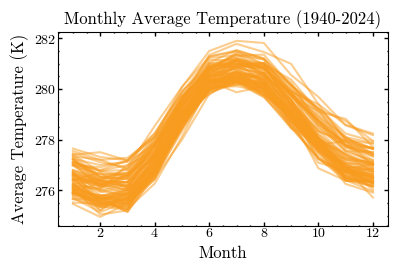

In [23]:
monthly_temp = temp_data.group_by(
    ["temp_year", "temp_month"]
    ).agg(pl.col("avg_temp").mean())

for year in range(1940, 2025):
    sns.lineplot(
        data=monthly_temp.filter(pl.col("temp_year") == year), 
        x="temp_month", 
        y="avg_temp", 
        color=Color.ORANGE.value, 
        alpha=0.5, 
        legend=None
        )

plt.title("Monthly Average Temperature (1940-2024)")
plt.xlabel("Month")
plt.ylabel("Average Temperature (K)")

plt.savefig(
    PLOTS / "monthly-average-temperature-1940-2024_dpi-300.svg", 
    format="svg",
    dpi=300, 
    transparent=True, 
    bbox_inches="tight"
    )

**Observations**

The data shows a clear and predictable seasonal pattern, with regular highs in summer and lows in winter, forming a consistent yearly cycle.

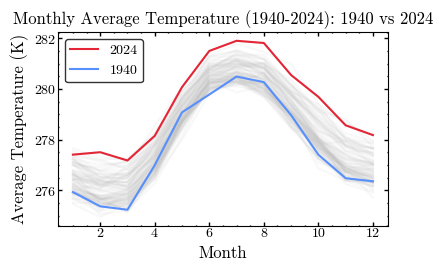

In [24]:
monthly_temp = temp_data.group_by(
    ["temp_year", "temp_month"]
    ).agg(pl.col("avg_temp").mean())

for year in range(1940, 2025):
    sns.lineplot(
        data=monthly_temp.filter(pl.col("temp_year") == year), 
        x="temp_month", 
        y="avg_temp", 
        color=Color.LIGHT_GRAY.value, 
        alpha=0.1, 
        legend=None
        )

sns.lineplot(
    data=monthly_temp.filter(pl.col("temp_year") == 2024), 
    x="temp_month", 
    y="avg_temp", 
    color=Color.RED.value, 
    legend=True, 
    label="2024"
)
sns.lineplot(
    data=monthly_temp.filter(pl.col("temp_year") == 1940), 
    x="temp_month", 
    y="avg_temp", 
    color=Color.BLUE.value, 
    legend=True, 
    label="1940"
)

plt.title("Monthly Average Temperature (1940-2024): 1940 vs 2024")
plt.xlabel("Month")
plt.ylabel("Average Temperature (K)")

plt.savefig(
    PLOTS / "monthly-average-temperature-1940-2024-1940vs2024.svg", 
    format="svg",
    dpi=300, 
    transparent=True, 
    bbox_inches="tight"
    )

**Observations**

**Seasonality:** Clear yearly cycle peaks in July to August (appr. 280 K) and lows in January to February (~276 K).

1. **Stationarity in Seasonality:** The seasonal cycle repeats, but baseline values are higher now than in the 1940s, confirming non-stationarity.
2. **Cyclicity:** Certain years show unusually hot summers or mild winters, connected to irregular multi-year climate cycles.





**Data insights**

* Seasonal behavior is predictable and consistent, but baseline warming shifts upward.

* Climate variability is stronger in winter months, which may affect polar regions more severely.

**How can we use this data?**

- To model seasonal energy demand (e.g., cooling in summers, heating in winters).

- To aid in crop planning and food security, since growing cycles depend on seasonal patterns.

- To improve early-warning systems for unusual seasonal shifts (e.g., heatwaves, mild winters).